In [4]:
! pip install mglearn

In [3]:
! python -m pip install --upgrade pip


     ---------------------------------------- 2.0/2.0 MB 1.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [2]:
import numpy
import mglearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
X, Y = mglearn.datasets.make_forge()

D:\Programming\Python\sample projects\ML\senv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Second Feature')

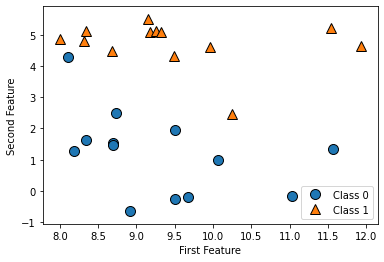

In [4]:
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First Feature')
plt.ylabel('Second Feature')

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# breast cancer dataset info
print('keys: ', cancer.keys())
print('Shape: ', cancer.data.shape) # 569 sample at 30 faeture
print('Feature: ', cancer.feature_names)
print('Sample ocnsts per class: ', {n: v for n, v in zip (cancer.target_names, np.bincount(cancer.target))})

keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape:  (569, 30)
Feature:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Sample ocnsts per class:  {'malignant': 212, 'benign': 357}


D:\Programming\Python\sample projects\ML\senv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


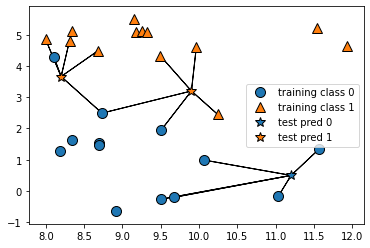

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [19]:
from sklearn.model_selection import train_test_split
X, Y = mglearn.datasets.make_forge()
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=0)

D:\Programming\Python\sample projects\ML\senv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3)

In [21]:
knc.fit(xtrain, ytrain) # model study

KNeighborsClassifier(n_neighbors=3)

In [27]:
print('test set of predictions: ', knc.predict(xtest))
print('test set accuracy: {:.2f}'.format(knc.score(xtest, ytest)))

test set of predictions:  [1 0 1 0 1 0 0]
test set accuracy: 0.86


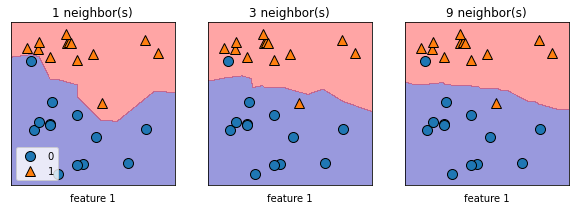

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

n_neighbors = [1, 3, 9]
for n_neighbor, ax in zip(n_neighbors, axes):
    """
    the fit method returns the object self, so we can 
    instantiaate and fit
    """
    clf = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X, Y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], Y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbor))
    ax.set_xlabel("feature 0")
    ax.set_xlabel("feature 1")
axes[0].legend(loc=3)

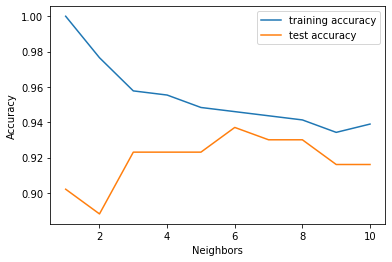

In [41]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_Train, X_Test, Y_Train, Y_Test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=66)

trainings_accuracy = []
tests_accuracy = []
neighbors = range(1, 11)

for n in neighbors:
    # biuld the model
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_Train, Y_Train)
    # record training set accuracy
    trainings_accuracy.append(clf.score(X_Train, Y_Train))
    # record test accuracy
    tests_accuracy.append(clf.score(X_Test, Y_Test))

plt.plot(neighbors, trainings_accuracy, label="training accuracy")
plt.plot(neighbors, tests_accuracy, label="test accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Neighbors')
plt.legend()